In [1]:
import pandas as pd

In [2]:
balloon_data = pd.read_csv("yellow-small+adult-stretch.data", names=['color','size','act','age','inflated'])

In [3]:
balloon_data

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T
5,YELLOW,LARGE,STRETCH,CHILD,F
6,YELLOW,LARGE,DIP,ADULT,F
7,YELLOW,LARGE,DIP,CHILD,F
8,PURPLE,SMALL,STRETCH,ADULT,T
9,PURPLE,SMALL,STRETCH,CHILD,F


## Task 1: Understandin the data

In [4]:
balloon_data.color.value_counts()

PURPLE    8
YELLOW    8
Name: color, dtype: int64

In [5]:
balloon_data['size'].value_counts()

SMALL    8
LARGE    8
Name: size, dtype: int64

In [6]:
balloon_data['act'].value_counts()

DIP        8
STRETCH    8
Name: act, dtype: int64

In [7]:
balloon_data['age'].value_counts()

CHILD    8
ADULT    8
Name: age, dtype: int64

In [8]:
balloon_data['inflated'].value_counts()

F    9
T    7
Name: inflated, dtype: int64

* 50% of the balloons are yellow and 50% are purple in color
* 50% of the balloons are small and 50% are large in size
* 50% of the balloons are stretched and 50% are dip
* 50% of the balloons are for child and 50% are for adult.
* Of total 16 balloons 9 are not inflated and 7 are inflated

# Task 2: Manually - Generate Decision Tree using Information Gain & Gini Impurity 

In [12]:
# encode the data set using ordinal encoder.
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
encoded_data = ord_enc.fit_transform(balloon_data)
# encoded data is a numpy array
# convert the data to dataframe
data = pd.DataFrame(encoded_data, columns=['color','size','act','age','inflated'], dtype=int)

In [13]:
data

,color,size,act,age,inflated
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,1,1
4,1,0,1,0,1
5,1,0,1,1,0
6,1,0,0,0,0
7,1,0,0,1,0
8,0,1,1,0,1
9,0,1,1,1,0


## Gini Gain

In [60]:
class DTreeClassifierGini():
    
    def __init__(self):
        self.feature_ranges = {}   # This will store all the possible dicision boundary for every feature
        
    # Method to create decisions
    def create_decision(self, featured_data):
        
        for column in featured_data.columns:
            ranges = []  # this will store all the possible decision boundaries for a particular column of feature
            i = 0.5      # A minimum fixed decision boundary
            
            cat_max = featured_data[column].max()   # maximum value of a given feature
            
            # below block of code will identify all the decision boundary
            while i < cat_max:
                ranges.append(i)
                i += 1   # increase i by one
                
            self.feature_ranges[column] = ranges   # all decision boundary for the column is stored in feature_ranges
        
        decisions = list(self.feature_ranges.items())   # list of (feature, list of decision boundary or buckets)
        
        self.decisions = []  # this will store all possible (feature, one decision) and this task will be done by below block of code
        
        for feature, dec_boundaries in decisions:
            for decision in dec_boundaries:
                self.decisions.append((feature, decision))
                
    # Method to calculate gini value
    def calculate_gini(self, target):
        total_values = len(target)   # total records
        
        count_diff_target_value = list(target.value_counts().values)
        
        gini = 0   # initialize gini as zero
        
        for value_count in count_diff_target_value:
            gini += (value_count/total_values) * (1 - (value_count/total_values))   # formula to calculate gini value
        
        return gini
    
    
    # Method to select decisions
    def select_decision(self, data):
        gini_before_split = self.calculate_gini(data.target)
        if gini_before_split == 0:
            return
        # print('***Gini before split***: ', gini_before_split)
        
        max_gini_gain = 0   # initialize max gini gain as zero
        
        for feature, value in self.decisions:
            
            left_data = data[data[feature] < value]  # left node of the tree after split
            
            left_data_gini = self.calculate_gini(left_data.target)  # gini calculation for left node
            
            right_data = data[data[feature] > value]   # right node of the tree after split
            
            right_data_gini = self.calculate_gini(right_data.target)  # gini calculation for right node
            
            # formula to calculate gini after split
            gini_after_split = (left_data.shape[0]/data.shape[0]) * left_data_gini + (right_data.shape[0]/data.shape[0]) * right_data_gini
            
            gini_gain = gini_before_split - gini_after_split
            
            # this block of code will find the best split
            if gini_gain > max_gini_gain:
                max_gini_gain = gini_gain
                
                best_left_data = left_data
                
                best_right_data = right_data
                
                best_feature = feature
                
                best_decision = value
                
        print("Gini Before Split: ", gini_before_split)
                
        print("Best Feature: ", best_feature, ", ", 'Best Decision: ', best_decision)
        
       # print('Gini value left: ', left_data_gini)
        
        self.select_decision(best_left_data)   # select decision for left node
        
        print('Gini value left: ', left_data_gini)
        
        #print('Gini value right: ', right_data_gini)
        
        self.select_decision(best_right_data)  # select decision for right node
        
        print('Gini value right: ', right_data_gini)
        
    # Method to fit the data
    def fit_data(self, feature_data, target_data):
        
        feature_data['target'] = target_data
        data = feature_data
        self.select_decision(data)
                
                
            

In [61]:
dtree = DTreeClassifierGini()

In [62]:
dtree.create_decision(data.drop(columns=['inflated']))

In [63]:
dtree.fit_data(data.drop(columns=['inflated']), data.inflated)

Gini Before Split:  0.4921875
Best Feature:  color ,  Best Decision:  0.5
Gini Before Split:  0.375
Best Feature:  act ,  Best Decision:  0.5
Gini value left:  0.5
Gini Before Split:  0.5
Best Feature:  age ,  Best Decision:  0.5
Gini value left:  0.0
Gini value right:  0.0
Gini value right:  0.0
Gini value left:  0.46875
Gini Before Split:  0.46875
Best Feature:  size ,  Best Decision:  0.5
Gini Before Split:  0.375
Best Feature:  act ,  Best Decision:  0.5
Gini value left:  0.5
Gini Before Split:  0.5
Best Feature:  age ,  Best Decision:  0.5
Gini value left:  0.0
Gini value right:  0.0
Gini value right:  0.0
Gini value left:  0.375
Gini value right:  0.5
Gini value right:  0.375


## Information gain

In [51]:
import numpy as np

In [77]:
class DTreeClassifierEntropy():
    
    def __init__(self):
        self.feature_ranges = {}   # This will store all the possible dicision boundary for every feature
        
    # Method to create decisions
    def create_decision(self, featured_data):
        
        for column in featured_data.columns:
            ranges = []  # this will store all the possible decision boundaries for a particular column of feature
            i = 0.5      # A minimum fixed decision boundary
            
            cat_max = featured_data[column].max()   # maximum value of a given feature
            
            # below block of code will identify all the decision boundary
            while i < cat_max:
                ranges.append(i)
                i += 1   # increase i by one
                
            self.feature_ranges[column] = ranges   # all decision boundary for the column is stored in feature_ranges
        
        decisions = list(self.feature_ranges.items())   # list of (feature, list of decision boundary or buckets)
        
        self.decisions = []  # this will store all possible (feature, one decision) and this task will be done by below block of code
        
        for feature, dec_boundaries in decisions:
            for decision in dec_boundaries:
                self.decisions.append((feature, decision))
                
    # Method to calculate entropy
    def calculate_entropy(self, target):
        total_values = len(target)   # total records
        
        count_diff_target_value = list(target.value_counts().values)
        
        entropy = 0   # initialize entropy as zero
        
        for value_count in count_diff_target_value:
            entropy += (value_count/total_values) * np.log2(value_count/total_values)   # formula to calculate entropy value
        
        if entropy < 0:
            return -entropy
        return entropy
    
    
    # Method to select decisions
    def select_decision(self, data):
        entropy_before_split = self.calculate_entropy(data.target)
        if entropy_before_split == 0:
            return
        
        max_info_gain = 0   # initialize max info gain as zero
        
        for feature, value in self.decisions:
            
            left_data = data[data[feature] < value]  # left node of the tree after split
            
            left_data_entropy = self.calculate_entropy(left_data.target)  # gini calculation for left node
            
            right_data = data[data[feature] > value]   # right node of the tree after split
            
            right_data_entropy = self.calculate_entropy(right_data.target)  # gini calculation for right node
            
            # formula to calculate entropy after split
            entropy_after_split = (left_data.shape[0]/data.shape[0]) * left_data_entropy + (right_data.shape[0]/data.shape[0]) * right_data_entropy
            
            info_gain = entropy_before_split - entropy_after_split
            
            # this block of code will find the best split
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                
                best_left_data = left_data
                
                best_right_data = right_data
                
                best_feature = feature
                
                best_decision = value
            """else:
                best_left_data = left_data
                
                best_right_data = right_data
                
                best_feature = feature
                
                best_decision = value"""
                
                
        print("Entropy Before Split: ", entropy_before_split)
                
        print("Best Feature: ", best_feature, ", ", 'Best Decision: ', best_decision)
                
        self.select_decision(best_left_data)   # select decision for left node
        
        print('Entropy value left: ', left_data_entropy)
                
        self.select_decision(best_right_data)  # select decision for right node
        
        print('Entropy value right: ', right_data_entropy)
        
    # Method to fit the data
    def fit_data(self, feature_data, target_data):
        
        feature_data['target'] = target_data
        data = feature_data
        self.select_decision(data)
                
                
            

In [78]:
dtree = DTreeClassifierEntropy()

In [79]:
dtree.create_decision(data.drop(columns=['inflated']))

In [80]:
dtree.fit_data(data.drop(columns=['inflated']), data.inflated)

Entropy Before Split:  0.9886994082884974
Best Feature:  color ,  Best Decision:  0.5
Entropy Before Split:  0.8112781244591328
Best Feature:  act ,  Best Decision:  0.5
Entropy value left:  1.0
Entropy Before Split:  1.0
Best Feature:  age ,  Best Decision:  0.5
Entropy value left:  0.0
Entropy value right:  0.0
Entropy value right:  0.0
Entropy value left:  0.954434002924965
Entropy Before Split:  0.954434002924965
Best Feature:  size ,  Best Decision:  0.5
Entropy Before Split:  0.8112781244591328
Best Feature:  act ,  Best Decision:  0.5
Entropy value left:  1.0
Entropy Before Split:  1.0
Best Feature:  age ,  Best Decision:  0.5
Entropy value left:  0.0
Entropy value right:  0.0
Entropy value right:  0.0
Entropy value left:  0.8112781244591328
Entropy value right:  1.0
Entropy value right:  0.8112781244591328


# Task 3: scikit - Generate & Display Decision Tree using export_graphviz

In [89]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()

In [90]:
Dtree.fit(data.drop(columns=['inflated']), data['inflated'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
from sklearn.tree import export_graphviz

In [92]:
export_graphviz(Dtree, 'Dtree_gini.tree', feature_names=['color','size','act','age'])

### Tree

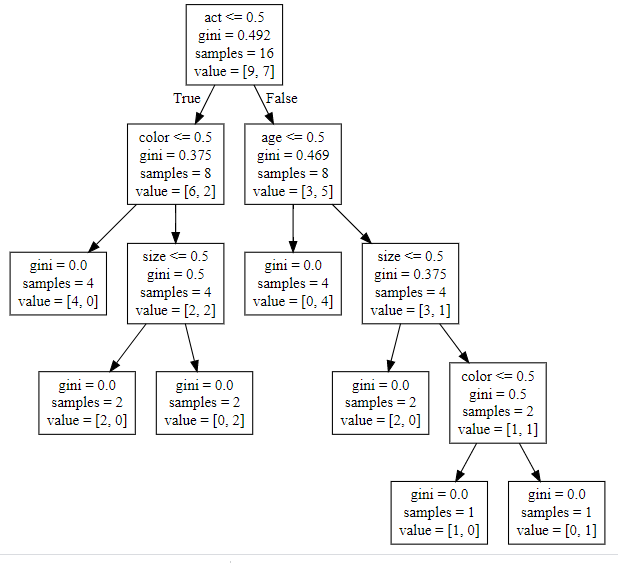